In [98]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv("temperature.csv")

In [30]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [31]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [34]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [37]:
df["LDAPS_PPT4"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
7747     0.000000
7748     0.000000
7749     0.000000
7750     0.000000
7751    16.655469
Name: LDAPS_PPT4, Length: 7752, dtype: float64

In [38]:
from sklearn.preprocessing import MinMaxScaler


In [42]:
df.drop(["Date"],axis=1,inplace=True)

In [45]:
df.drop(["LDAPS_PPT2"],axis=1,inplace=True)
df.drop(["LDAPS_PPT3"],axis=1,inplace=True)
df.drop(["LDAPS_PPT4"],axis=1,inplace=True)

In [39]:
mms=MinMaxScaler()

In [46]:
mms.fit_transform(df)

array([[0.        , 0.49431818, 0.54301075, ..., 1.        , 0.54418605,
        0.53513514],
       [0.04166667, 0.67613636, 0.55376344, ..., 0.92570319, 0.60930233,
        0.60540541],
       [0.08333333, 0.65909091, 0.64516129, ..., 0.92224225, 0.6372093 ,
        0.68108108],
       ...,
       [1.        , 0.18181818, 0.32795699, ..., 0.07323945, 0.48372093,
        0.32972973],
       [       nan, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [       nan, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [47]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.161697,0.130928,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.159444,0.127727,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.204091,0.142125,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.161157,0.134249,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.178892,0.170021,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000796,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [48]:
df.shape

(7752, 21)

In [49]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  lat               7752 non-null   float64
 15  lon               7752 non-null   float64
 16  DEM               7752 non-null   float64


In [51]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [54]:
df.dropna(inplace=True)

In [55]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

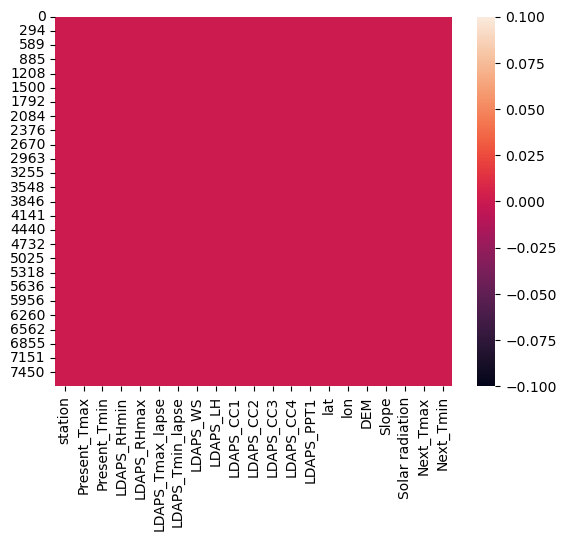

In [56]:
sns.heatmap(df.isnull())

In [57]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.000161,0.005005,-0.001954,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.146391,-0.143069,-0.114917,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.004719,-0.046694,0.111577,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.688069,0.513937,0.259039,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.224734,0.127242,0.268019,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.542728,-0.429739,-0.115659,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.044998,-0.079536,0.034956,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.238155,0.218870,0.141503,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.246709,-0.173156,-0.018708,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.516698,0.362670,0.446930,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

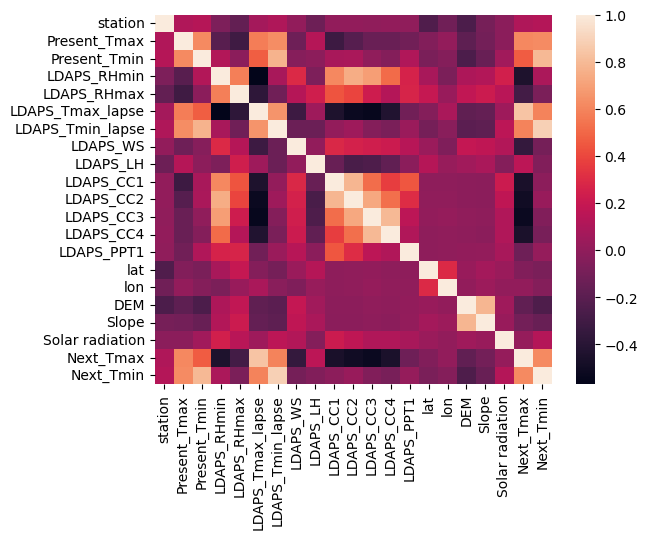

In [58]:
sns.heatmap(df.corr())

LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 columns shows the negative correlation with Next_Tmax so we can drop these columns

In [62]:
df.drop(["LDAPS_CC1"],axis=1,inplace=True)
df.drop(["LDAPS_CC2"],axis=1,inplace=True)
df.drop(["LDAPS_CC3"],axis=1,inplace=True)
df.drop(["LDAPS_CC4"],axis=1,inplace=True)

In [65]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.589008,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,1.927577,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.052594,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,23.701544,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max

In [66]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_PPT1          5.305906
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='

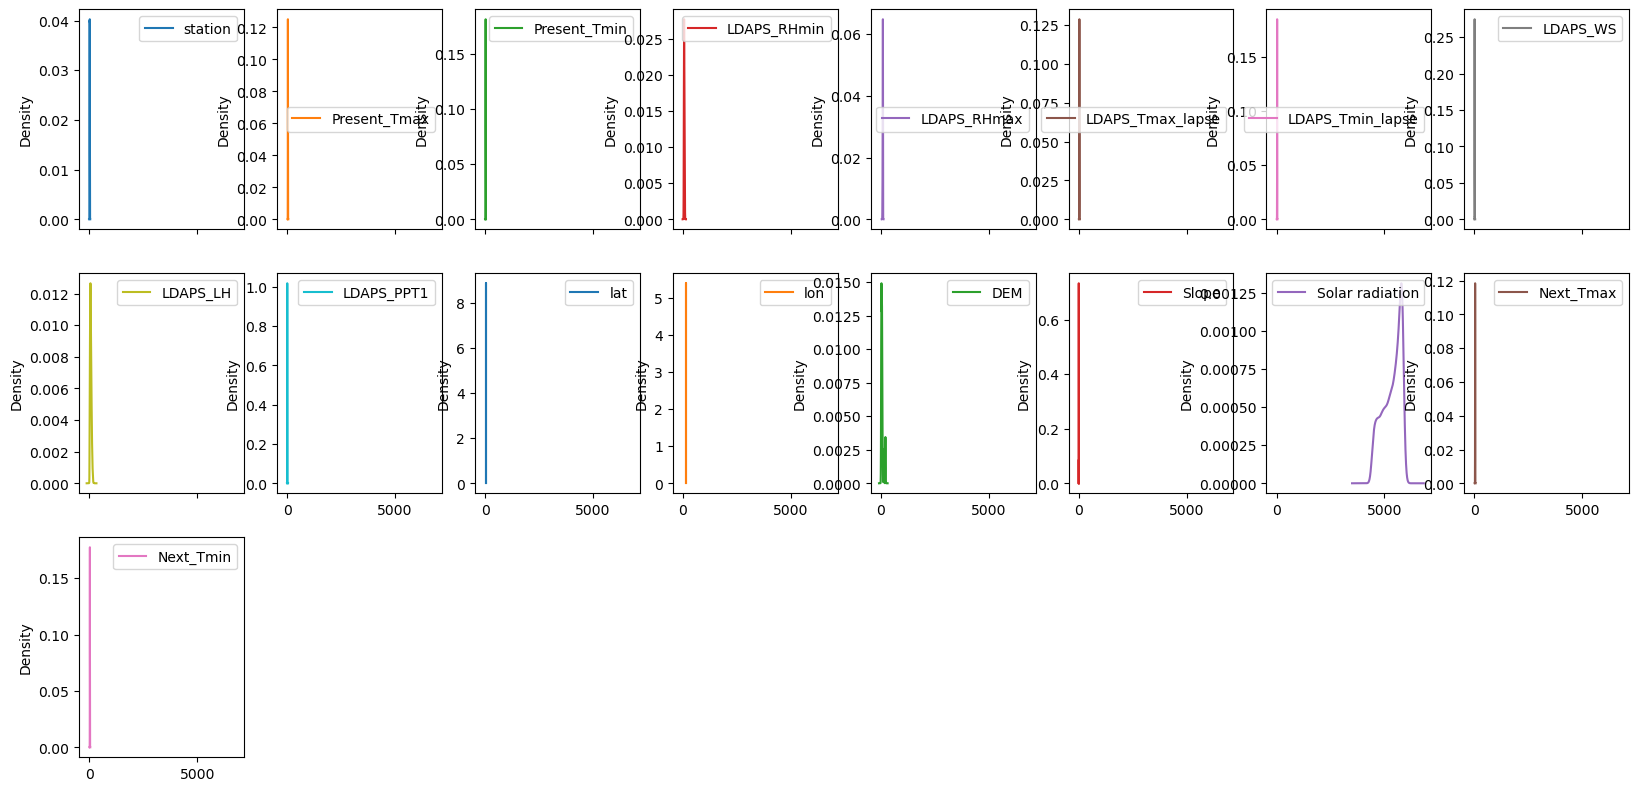

In [67]:
df.plot(kind="kde",subplots=True,layout=(6,8),figsize=(20,20))

from the above graphical visualisation we get to know there is no skewness present in dataset(df)

station                 AxesSubplot(0.125,0.77;0.0824468x0.11)
Present_Tmax         AxesSubplot(0.223936,0.77;0.0824468x0.11)
Present_Tmin         AxesSubplot(0.322872,0.77;0.0824468x0.11)
LDAPS_RHmin          AxesSubplot(0.421809,0.77;0.0824468x0.11)
LDAPS_RHmax          AxesSubplot(0.520745,0.77;0.0824468x0.11)
LDAPS_Tmax_lapse     AxesSubplot(0.619681,0.77;0.0824468x0.11)
LDAPS_Tmin_lapse     AxesSubplot(0.718617,0.77;0.0824468x0.11)
LDAPS_WS             AxesSubplot(0.817553,0.77;0.0824468x0.11)
LDAPS_LH               AxesSubplot(0.125,0.638;0.0824468x0.11)
LDAPS_PPT1          AxesSubplot(0.223936,0.638;0.0824468x0.11)
lat                 AxesSubplot(0.322872,0.638;0.0824468x0.11)
lon                 AxesSubplot(0.421809,0.638;0.0824468x0.11)
DEM                 AxesSubplot(0.520745,0.638;0.0824468x0.11)
Slope               AxesSubplot(0.619681,0.638;0.0824468x0.11)
Solar radiation     AxesSubplot(0.718617,0.638;0.0824468x0.11)
Next_Tmax           AxesSubplot(0.817553,0.638;0.082446

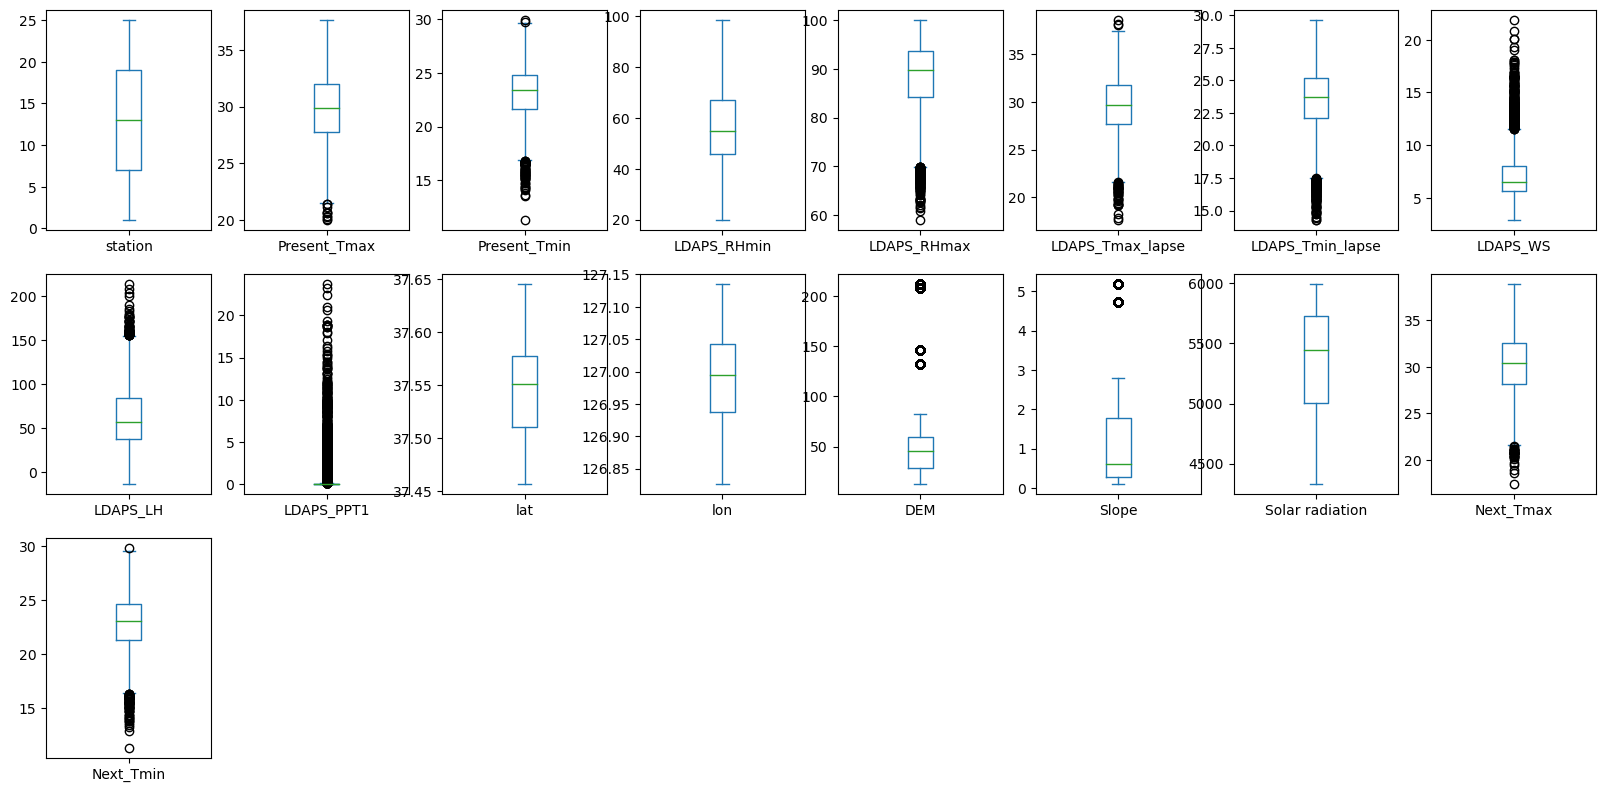

In [68]:
df.plot(kind="box",subplots=True,layout=(6,8),figsize=(20,20))

from this above visualization we get to know that outliers are present in dataset

In [69]:
from scipy.stats import zscore

In [70]:
z=np.abs(zscore(df))

In [71]:
z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.664607,0.353318,0.748029,0.104660,0.382768,0.525269,0.215525,0.126423,0.206603,0.305589,1.186076,0.005302,2.769091,1.111162,1.510565,0.366861,0.689265
1,1.526052,0.725138,0.664721,0.305052,0.311697,0.078334,0.223368,0.644133,0.313359,0.305589,1.186076,0.512280,0.315828,0.543220,1.222997,0.083068,0.165513
2,1.387498,0.624033,0.043400,0.549344,0.609425,0.160080,0.449896,0.439100,1.244497,0.305589,0.650626,0.840503,0.526719,0.723891,1.209602,0.275895,0.398527
3,1.248943,0.758840,0.085054,0.103573,1.128335,0.028710,0.079238,0.663353,0.096026,0.305589,1.987268,0.386040,0.298272,0.928888,1.194265,0.468721,0.559681
4,1.110389,0.556630,0.539758,0.037665,0.249244,0.171981,0.010803,0.624327,1.349989,0.305589,0.117159,1.812547,0.494848,0.549485,1.200286,0.308032,0.165513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.106481,2.240616,2.247578,2.190405,1.402898,0.614083,2.223667,0.225479,1.569844,0.305589,0.117159,0.613271,0.655747,0.500966,2.065599,0.848928,2.099366
7746,1.245036,2.442826,2.414195,1.820788,0.648815,0.990460,2.432415,0.609132,0.583486,0.305589,0.686016,1.193973,0.735482,0.820711,2.098689,0.720377,2.341098
7747,1.383590,2.173212,2.539157,2.050081,1.318376,1.110333,2.021883,0.434188,0.283984,0.305589,0.150566,1.267697,0.852919,0.804538,2.095175,0.623964,1.938212
7748,1.522145,2.173212,2.289232,2.234735,1.537141,0.886737,2.039881,0.253241,0.452772,0.305589,0.418291,1.040466,0.821476,0.755800,2.106671,0.527550,1.656192


In [72]:
threashold=3
print(np.where(z>3))

(array([  25,   33,   44,  175,  194,  268,  292,  302,  304,  305,  306,
        307,  308,  310,  311,  312,  314,  318,  319,  320,  321,  322,
        323,  324,  325,  326,  328,  334,  336,  338,  340,  341,  341,
        344,  350,  353,  366,  372,  391,  399,  408,  410,  413,  416,
        421,  489,  514,  520,  521,  523,  525,  526,  527,  528,  529,
        531,  533,  534,  535,  537,  538,  539,  539,  540,  542,  543,
        544,  564,  570,  579,  589,  710,  713,  958,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195,
       1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206,
       1207, 1208, 1209, 1290, 1295, 1302, 1306, 1454, 1612, 1621, 1623,
       1624, 1630, 1634, 1738, 1739, 1741, 1751, 1754, 1941, 1944, 1950,
       2069, 2075, 2092, 2094, 2098, 2100, 2102, 2

In [73]:
df_n=df[(z<3).all(axis=1)]

In [74]:
df_n

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [75]:
df=df_n

In [76]:
x=df.iloc[:,0:-2]

# for Next_Tmax prediction

In [77]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.0,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.0,37.5507,127.040,26.2980,0.5721,4456.024414
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.0,37.5102,127.086,21.9668,0.1332,4441.803711
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.0,37.5372,126.891,15.5876,0.1554,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.0,37.5237,126.909,17.2956,0.2223,4438.373535


In [78]:
y=df.iloc[:,-2]

In [79]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7126, dtype: float64

In [91]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=47)

In [92]:
lg=LinearRegression()

In [93]:
lg.fit(xtrain,ytrain)

LinearRegression()

In [94]:
lg.score(xtrain,ytrain)

0.7485078161490574

In [96]:
lpred=lg.predict(xtest)

In [97]:
print("Mean squared error",mean_squared_error(ytest,lpred))
print("Mean absolute_error",mean_absolute_error(ytest,lpred))
print("Root mean Squared error",np.sqrt(mean_squared_error(ytest,lpred)))

Mean squared error 2.3472663993532756
Mean absolute_error 1.1704906516240363
Root mean Squared error 1.5320791100179114


In [100]:
el=ElasticNet()

In [101]:
el.fit(xtrain,ytrain)

ElasticNet()

In [102]:
el.score(xtrain,ytrain)

0.7210076330689341

In [103]:
epred=el.predict(xtest)

In [104]:
print("Mean squared error",mean_squared_error(ytest,epred))
print("Mean absolute_error",mean_absolute_error(ytest,epred))
print("Root mean Squared error",np.sqrt(mean_squared_error(ytest,epred)))

Mean squared error 2.5494806586393035
Mean absolute_error 1.2289534671753057
Root mean Squared error 1.5967093218990436


In [105]:
#lets take a example
p=np.array([1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.0,7.6046,126.991,212.3350,2.7850,5992.895996])

In [106]:
p=p.reshape(1,-1)

In [107]:
lg.predict(p)

array([52.77291831])

In [109]:
el.predict(p)

array([29.07921503])

Hence the elastic net is doing well in prediction of y value 
so model is working fine

# for Next_Tmin prediction

In [115]:
columns = ["Next_Tmin", "Next_Tmax"]

In [116]:
a=df.drop(columns=columns,axis=1)

In [117]:
a

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.0,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.0,37.5507,127.040,26.2980,0.5721,4456.024414
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.0,37.5102,127.086,21.9668,0.1332,4441.803711
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.0,37.5372,126.891,15.5876,0.1554,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.0,37.5237,126.909,17.2956,0.2223,4438.373535


In [118]:
b=df["Next_Tmin"]

In [119]:
b

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7126, dtype: float64

In [120]:
atrain,atest,btrain,btest=train_test_split(a,b,test_size=.30,random_state=47)

In [124]:
lg.fit(atrain,btrain)

LinearRegression()

In [127]:
lg.score(atrain,btrain)

0.8279389687741343

In [128]:
lg_ab=lg.predict(atest)

In [129]:
print("Mean squared error",mean_squared_error(ytest,lg_ab))
print("Mean absolute_error",mean_absolute_error(ytest,lg_ab))
print("Root mean Squared error",np.sqrt(mean_squared_error(ytest,lg_ab)))

Mean squared error 60.51176102815541
Mean absolute_error 7.378965493161265
Root mean Squared error 7.778930583837049


In [121]:
el.fit(atrain,btrain)

ElasticNet()

In [126]:
el.score(atrain,btrain)

0.7983454503315963

In [122]:
elpred=el.predict(atest)

In [123]:
print("Mean squared error",mean_squared_error(ytest,elpred))
print("Mean absolute_error",mean_absolute_error(ytest,elpred))
print("Root mean Squared error",np.sqrt(mean_squared_error(ytest,elpred)))

Mean squared error 60.177387072462075
Mean absolute_error 7.368038513600036
Root mean Squared error 7.757408528140186


In [130]:
el.predict(p)

array([21.65248889])

Hence the elastic net is doing well in prediction of y value .  

so, model is working fine